# Series 
Supongamos que queremos calcular la serie $\sum_{n=1}^\infty \frac{(-1)^n}{n}$

In [1]:
N=10000
Sum=0.0
for n=1:2:N
   global Sum +=-1/n+1/(n+1)
end
Sum

-0.6930971830599458

In [2]:
function SN(N)
    Sum=0.0
for n=1:2:N
   Sum +=-1/n+1/(n+1)
end
Sum
end

SN (generic function with 1 method)

In [3]:
sn=[SN(10^4), SN(10^5), SN(10^6), SN(10^7), SN(10^8)]

5-element Array{Float64,1}:
 -0.6930971830599458
 -0.6931421805849444
 -0.6931466805602322
 -0.693147130559867 
 -0.6931471754736985

In [4]:
-log(2)

-0.6931471805599453

In [5]:
sn.+log(2)

5-element Array{Float64,1}:
 4.9997499999454575e-5
 4.999975000918866e-6 
 4.999997130772371e-7 
 5.0000078299916595e-8
 5.086246757102231e-9 

# Derivada
Supongamos que quremos aproximar la derivada de una función. Tomemos como ejemplo una sencilla del cual sabemos su resultado. Por ejemplo $f(x)=x^2$.

In [13]:
function Der(Delta,func,x)
    (func(x+Delta)-func(x))/Delta
end
    

Der (generic function with 1 method)

In [14]:
Der(0.0001,x->x^2,1)

2.000099999999172

In [21]:
Der.([10.0^(-i) for i=1:7],x->x^2,1)

7-element Array{Float64,1}:
 2.100000000000002 
 2.0100000000000007
 2.0009999999996975
 2.000099999999172 
 2.00001000001393  
 2.0000009999243673
 2.0000001010878066

Tomemos por defecto la función $x^2$ y en el punto $x=1$

In [15]:
function Der(Delta,func=x->x^2,x=1)
    (func(x+Delta)-func(x))/Delta
end

Der (generic function with 3 methods)

In [16]:
Der(0.0001)

2.000099999999172

In [17]:
using Plots

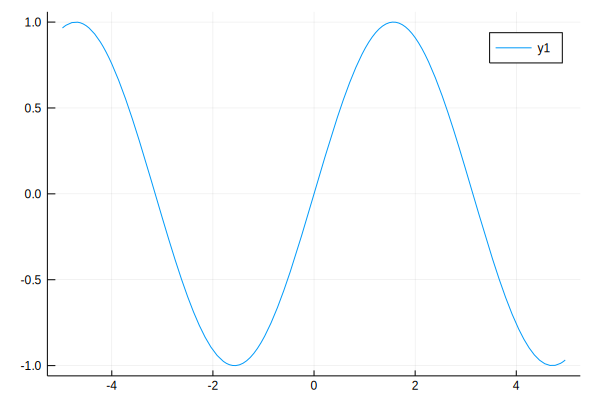

In [12]:
plot(sin)

In [19]:
Delta=[10.0.^(-i) for i=1:7]
println(Delta)
errorrel=abs.((Der.(Delta).-2)/2)

[0.1, 0.01, 0.001, 0.0001, 1.0e-5, 1.0e-6, 1.0e-7]


7-element Array{Float64,1}:
 0.05000000000000093  
 0.0050000000000003375
 0.0004999999998487326
 4.999999958599233e-5 
 5.000006964905879e-6 
 4.999621836532242e-7 
 5.0543903284960834e-8

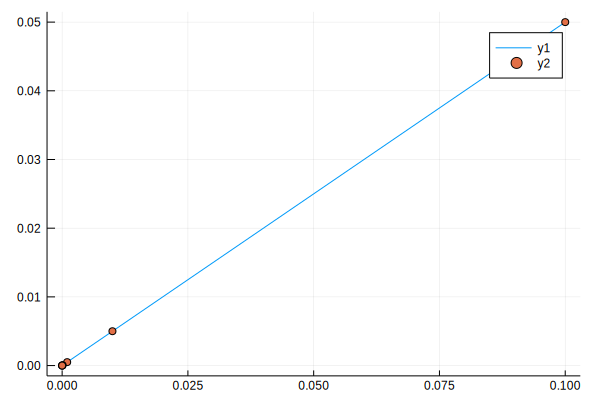

In [21]:
plot(Delta,errorrel)
scatter!(Delta, errorrel)

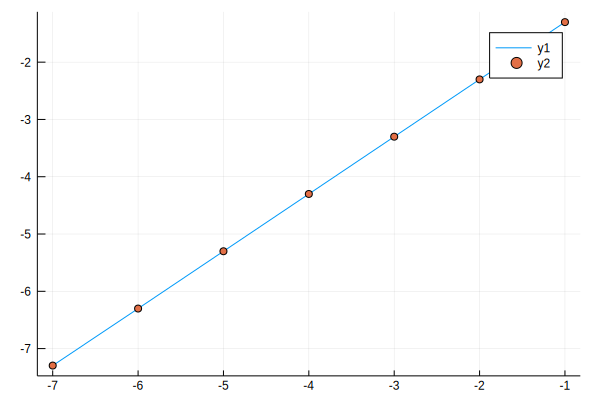

In [22]:
plot(log10.(Delta),log10.(errorrel))
scatter!(log10.(Delta),log10.(errorrel))

Cómo cambiar los labels de manera dinámica?? Ni idea

Qué sucede si afinamos aún más el Delta?

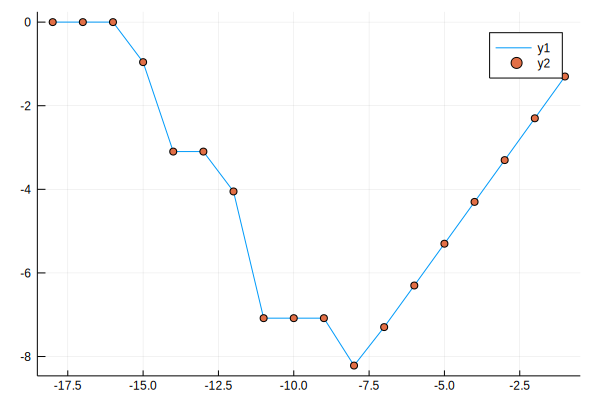

In [23]:
Delta=[10.0.^(-i) for i=1:18]
errorrel=abs.((Der.(Delta).-2)/2)
plot(log10.(Delta),log10.(errorrel))
scatter!(log10.(Delta),log10.(errorrel))

Varias preguntas surgen!

# Método de Newton
Supongamos que queremos encontrar un cero de una función $f$.

In [29]:
function NewMet(N, x=4.4, func=x->tanh(x-5.0),func′=x->sech(x-5.0)^2) #N son los iterados
    for i=1:N
    x-=func(x)/func′(x)   
    end
    x
end
    

NewMet (generic function with 4 methods)

In [31]:
NewMet.([i for i=1:5], 0)

5-element Array{Float64,1}:
 5506.616437351697
 -Inf             
  NaN             
  NaN             
  NaN             

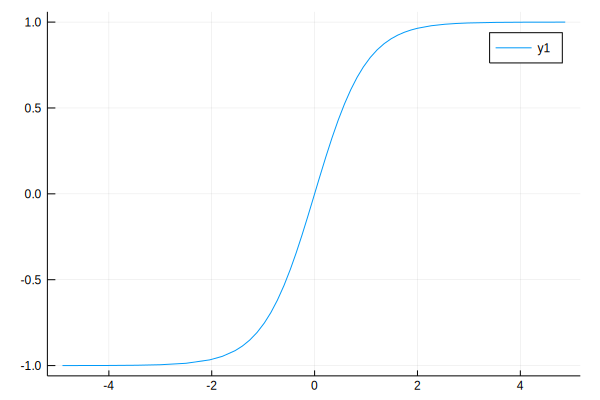

In [26]:
plot(tanh)

In [30]:
NewMet(1, 0)

5506.616437351697